# Sentiment Analysis of Amazon Reviews

# Task 1

You’ll be creating models to predict the reviews that lead to recommendations for the
product, 5-star ratings, and reviews being considered helpful, which are found in the
fields reviews.doRecommend, reviews.rating, and reviews.numHelpful respectively.
Create summary statistics and histograms for each of these fields. Do you see any issues
in using these fields as outcome (target) variables? 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#reading the csv file and creating a dataframe out of it
df_data = pd.read_csv("kindle_reviews.csv" , encoding = "unicode_escape")
df_data.head()

# only keeping rows that are of product kindle 
#Reference : https://www.pythonprogramming.in/how-to-filter-rows-containing-a-string-pattern-in-pandas-dataframe.html
df_data = df_data[df_data['name'].str.upper().str.contains('KINDLE')].reset_index()

df_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 24 columns):
index                  745 non-null int64
id                     745 non-null object
dateAdded              745 non-null object
dateUpdated            745 non-null object
name                   745 non-null object
asins                  745 non-null object
brand                  745 non-null object
categories             745 non-null object
primaryCategories      745 non-null object
imageURLs              745 non-null object
keys                   745 non-null object
manufacturer           745 non-null object
manufacturerNumber     745 non-null object
reviews.date           745 non-null object
reviews.dateSeen       745 non-null object
reviews.didPurchase    0 non-null float64
reviews.doRecommend    745 non-null bool
reviews.id             0 non-null float64
reviews.numHelpful     745 non-null int64
reviews.rating         745 non-null int64
reviews.sourceURLs     745 non-null object

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\steff\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


count      745
unique       2
top       True
freq       723
Name: reviews.doRecommend, dtype: object


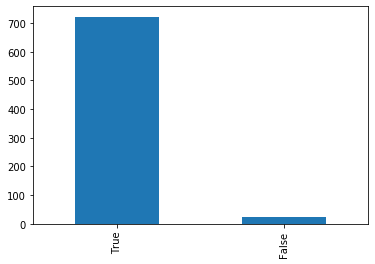

In [2]:
# Summary Statistics and bar plot for Column reviews.doRecommend
col_doRecommend = df_data.loc[: , 'reviews.doRecommend']
print(col_doRecommend.describe())

#Reference : https://stackoverflow.com/questions/47809646/how-to-make-a-histogram-for-non-numeric-variables-in-python
df_data['reviews.doRecommend'].value_counts().plot.bar()
plt.show()

count    745.000000
mean       4.703356
std        0.630158
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: reviews.rating, dtype: float64


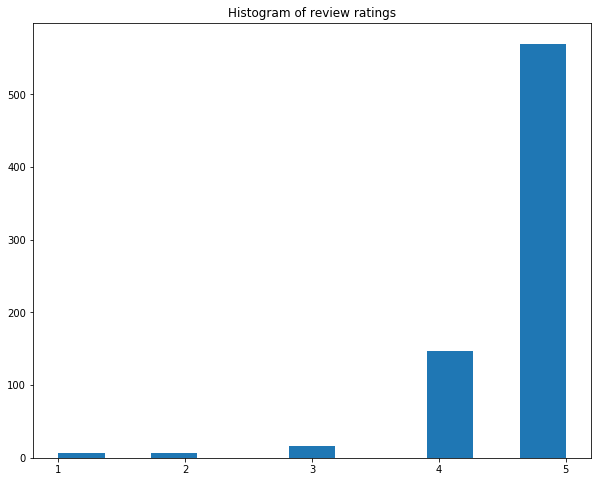

In [3]:
#Summary Statistics and histogram for Column reviews.rating
col_reviewsRating = df_data.loc[:, 'reviews.rating']
print(col_reviewsRating.describe())

plt.subplots(figsize = (10,8))
plt.hist(col_reviewsRating , bins = 'auto')
plt.title('Histogram of review ratings')
positions = (1, 2, 3 , 4, 5)
plt.xticks(positions)
plt.show()

count    745.000000
mean       1.868456
std        4.934124
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       72.000000
Name: reviews.numHelpful, dtype: float64


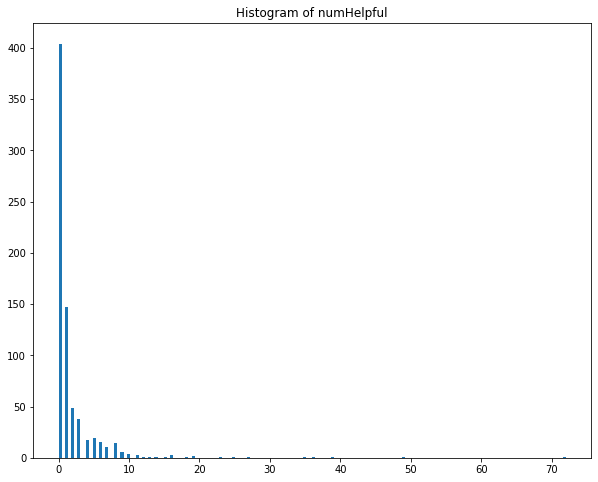

In [4]:
#Summary Statistics and histogram for Column reviews.numHelpful
col_numHelpful = df_data.loc[: , 'reviews.numHelpful']
print(col_numHelpful.describe())

plt.subplots(figsize = (10,8))
plt.hist(col_numHelpful , bins = 'auto')
plt.title('Histogram of numHelpful')
plt.show()

#Do you see any issues in using these fields as outcome (target) variables?

Issue 1 : The doRecommend column has boolean values True and False and will need to be converted to 1 and 0 respectively depending on the model used , as it may cause a problem while passing the column as a featuren variable in model prediction.

Issue 2: The ratings and doRecommend column has skewed values i.e. majority ratings are >=4 while the ,majority of doRecommend values is true. This may give a high accuracy in the model predictions but the results are biased as the data is skewed towards one direction.


# Task 2 

Prepare the text of the reviews in the reviews.text field for analysis by eliminating
stopwords. What are the top 10 most frequent words? What are the top 10 nouns?
What are the top ten adjectives? 

In [5]:
#Reference : https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
# nltk.download('punkt')
# nltk.download('wordnet')
    
stop = stopwords.words('english')

#Removing punction marks , numbers and html tags from sentences
df_data["without_punct"] = df_data['reviews.text'].str.replace('[^\w\s]','').str.replace('[\d+]','').str.replace('<.*?>' , '')

#Removing stopwords from the sentences and tokenizing the sentence 
df_data['without_stop'] = df_data['without_punct'].str.lower().apply(lambda x: [word for word in x.split() if word not in stop])
df_data


#Reference : https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
#Lemetizing of tokenized words 
lemmatizer = WordNetLemmatizer()

for index , rows in df_data['without_stop'].items():
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in rows])
    df_data.loc[index , 'temp_lem'] = lemmatized_output  
    lemmatized_output = " "
    
print(type(lemmatized_output))
df_data['temp_lem'] = df_data['temp_lem'].str.lower().apply(lambda x: [word for word in x.split()])
df_data

#Stemming of tokenized works
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

for index , rows in df_data['temp_lem'].items():
    stemmed_output = ' '.join([porter_stemmer.stem(w) for w in rows])
    df_data.loc[index , 'temp'] = stemmed_output  
    stemmed_output = " "
    
df_data['temp_stem'] = df_data['temp'].str.lower().apply(lambda x: [word for word in x.split()])    
df_data

<class 'str'>


,index,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,without_punct,without_stop,temp_lem,temp,temp_stem
0,0,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,5,https://reviews.bestbuy.com/3545/9302088/revie...,I bought this so i can save all of my books. I...,"A bit small, but very useful!!",Goldfish,I bought this so i can save all of my books It...,"[bought, save, books, bit, small, first, get, ...","[bought, save, book, bit, small, first, get, u...",bought save book bit small first get use overa...,"[bought, save, book, bit, small, first, get, u..."
1,1,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,5,http://reviews.bestbuy.com/3545/9302088/review...,I bought this as a gift. I think it is pretty ...,a decent gift,Zigpig,I bought this as a gift I think it is pretty d...,"[bought, gift, think, pretty, decent, quality,...","[bought, gift, think, pretty, decent, quality,...",bought gift think pretti decent qualiti design,"[bought, gift, think, pretti, decent, qualiti,..."
2,2,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,5,http://reviews.bestbuy.com/3545/9302088/review...,"This is a great e-reader, perhaps a little pri...",A great e-reader,david,This is a great ereader perhaps a little price...,"[great, ereader, perhaps, little, pricey, well...","[great, ereader, perhaps, little, pricey, well...",great eread perhap littl pricey well worth mon...,"[great, eread, perhap, littl, pricey, well, wo..."
3,3,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,5,http://reviews.bestbuy.com/3545/9302088/review...,"I have owned several Kindles over the years, a...",A great Kindle,Jimbo,I have owned several Kindles over the years an...,"[owned, several, kindles, years, one, best, ye...","[owned, several, kindles, year, one, best, yet...",own sever kindl year one best yet contrast cla...,"[own, sever, kindl, year, one, best, yet, cont..."
4,4,AVphPmHuilAPnD_x3E5h,2016-03-31T21:08:24Z,2019-03-12T04:21:17Z,"Kindle Voyage E-reader, 6 High-Resolution Disp...",B00IOY8XWQ,Amazon,"eBook Readers,Electronics Features,Walmart for...",Electronics,https://images-na.ssl-images-amazon.com/images...,...,5,http://reviews.bestbuy.com/3545/9302088/review...,Nothing will replace the joy of flipping throu...,A great space saver for book lovers,SillyGoober,Nothing will replace the joy of flipping throu...,"[nothing, replace, joy, flipping, pages, book,...","[nothing, replace, joy, flipping, page, book, ...",noth replac joy flip page book live studio apa...,"[noth, replac, joy, flip, page, book, live, st..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,839,AWP6zKOtIwln0LfXnf2p,2018-06-13T19:37:34Z,2019-02-24T22:26:51Z,All-New Kindle Oasis E-reader - 7 High-Resolut...,B06XCWLL12,Amazon,"E-Readers & Accessories,EBook Readers,Amazon B...","Electronics,Media",https://pisces.bbystatic.com/image2/BestBuy_US...,...,4,https://reviews.bestbuy.com/3545/6102700/revie...,This is perfect. I carry mine 24/7. Super fast...,Great Device,kcladyz,This is perfect I carry mine Super fast also ...,"[perfect, carry, mine, super, fa

# Top 10 most Frequent Words: 

In [6]:
#Reference : https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas
from collections import Counter

# Top 10 most frequent words
print('Top 10 most frequent words are: ')
Counter(" ".join(df_data["temp"]).split()).most_common(10)



Top 10 most frequent words are: 


[('kindl', 612),
 ('read', 435),
 ('light', 292),
 ('voyag', 243),
 ('love', 241),
 ('use', 226),
 ('screen', 214),
 ('great', 211),
 ('page', 201),
 ('one', 192)]

In [7]:
from nltk.tag import pos_tag

df_list = df_data[['temp' , 'temp_stem']]
df_new = pd.DataFrame(df_list)
df_new

#creating lists of nouns and adjectives using postag
temp_noun = []
temp_adj = []
for index , rows in df_new['temp_stem'].items():
    tagged_tokens = nltk.pos_tag(rows)
    for tup in tagged_tokens:
        if(tup[1] == 'NN' or tup[1] =='NNS' or tup[1] == 'NNP' or tup[1] == 'NNPS'):
            temp_noun.append(tup[0])  
        if(tup[1] == 'JJ' or tup[1] =='JJR' or tup[1] == 'JJS'):
            temp_adj.append(tup[0])
                

# Top 10 Nouns

In [8]:
#top 10 nouns
print('Top 10 Nouns:')
# print(len(temp_noun))
Counter(temp_noun).most_common(10)

Top 10 Nouns:


[('kindl', 446),
 ('page', 196),
 ('book', 180),
 ('use', 177),
 ('voyag', 170),
 ('reader', 150),
 ('screen', 136),
 ('easi', 126),
 ('paperwhit', 116),
 ('button', 113)]

# Top 10 Adjectives 

In [9]:
print('Top 10 Adjectives:')
Counter(temp_adj).most_common(10)

Top 10 Adjectives:


[('great', 211),
 ('light', 170),
 ('best', 128),
 ('read', 117),
 ('new', 106),
 ('much', 76),
 ('screen', 71),
 ('good', 70),
 ('upgrad', 69),
 ('nice', 67)]

# Task 3

What are the top ten most frequent words in reviews that do not recommend purchase
of the Kindle? 

In [10]:
#Filtering rows for reviews that have False reviews.doRecommend , since they are reviews that do not recommend purchase
df_temp = df_data[df_data['reviews.doRecommend'] == False]

#Removing stop words kindle , amazon and would since they aren't words that do not recommend purchase
stop = stopwords.words('english')
stop.append("kindle")
stop.append("amazon")
stop.append("would")

#Removing punction marks , numbers and html tags from sentences
df_temp["without_punct"] = df_temp['reviews.text'].str.replace('[^\w\s]','').str.replace('[\d+]','').str.replace('<.*?>' , '')

#Removing stopwrod and tokenizing the reviews 
df_temp['without_stop'] = df_temp['without_punct'].str.lower().apply(lambda x: [word for word in x.split() if word not in stop])


#Reference : https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
#Lemetizing of tokenized words 
lemmatizer = WordNetLemmatizer()

for index , rows in df_temp['without_stop'].items():
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in rows])
    df_temp.loc[index , 'temp_lem'] = lemmatized_output  
    lemmatized_output = " "

df_temp['temp_lem'] = df_temp['temp_lem'].str.lower().apply(lambda x: [word for word in x.split()])


#Stemming of tokenized works
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

for index , rows in df_temp['temp_lem'].items():
    stemmed_output = ' '.join([porter_stemmer.stem(w) for w in rows])
    df_temp.loc[index , 'temp'] = stemmed_output  
    stemmed_output = " "
    
df_temp['temp_stem'] = df_temp['temp'].str.lower().apply(lambda x: [word for word in x.split()])    




# Top 10 most frequent words in reviews that do not recommend purchase of the Kindle

In [11]:
# Top 10 most frequent words in reviews that do not recommend purchase of the Kindle
print(' Top 10 most frequent words in reviews that do not recommend purchase of the Kindle are: ')
Counter(" ".join(df_temp["temp"]).split()).most_common(10)

 Top 10 most frequent words in reviews that do not recommend purchase of the Kindle are: 


[('turn', 13),
 ('voyag', 10),
 ('light', 10),
 ('buy', 8),
 ('devic', 8),
 ('page', 7),
 ('better', 6),
 ('old', 5),
 ('screen', 5),
 ('custom', 5)]

# Task 4

Create a model that will predict when a customer will give the Kindle a 5-star rating
based on the text of the review. Evaluate the accuracy of your model. 

In [12]:
#Assigning sentiment 1 to 5-star ratings and 0 to others
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 0,
            5: 1}

df_data["sentiment_rating"] = df_data["reviews.rating"].map(sentiment)


In [13]:
#reference : https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
# building tfidf matrix to train models 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(df_data["temp"])



In [14]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(text, df_data["sentiment_rating"], test_size=0.3, random_state=1)

randomClf = RandomForestClassifier()
randomClf.fit(X_train, y_train)
y_pred = randomClf.predict(X_test)
print(classification_report(y_test , y_pred))


print("Train accuracy of model (R^2)" ,str(randomClf.score(X_train, y_train) ))
print("Test accuracy of model (R^2)" ,str(randomClf.score(X_test, y_test) ))



              precision    recall  f1-score   support

           0       0.95      0.37      0.53        52
           1       0.84      0.99      0.91       172

    accuracy                           0.85       224
   macro avg       0.89      0.68      0.72       224
weighted avg       0.86      0.85      0.82       224

Train accuracy of model (R^2) 0.9942418426103646
Test accuracy of model (R^2) 0.8482142857142857


# Task 5

Create a model that will predict when at least two customer will find a review helpful.
Evaluate the accuracy of your model 

In [15]:
#Assigning sentiment 1 to numHelpful >= 2 and 0 to others
df_data["sentiment_numHelpful"] = np.where(df_data["reviews.numHelpful"] >=2 ,1 , 0)


In [16]:
#Creating a dataframe of vectorized text
df_text = pd.DataFrame(text.toarray())

In [17]:
# adding columns doRecommend and ratings into dataframe to be used a training set
df_text['doRecommend'] = df_data[['reviews.doRecommend']]
df_text['rating'] = df_data[['reviews.rating']]
df_text['doRecommend'] = np.where(df_text['doRecommend'] == True , 1 , 0)


In [18]:
#Random Forest 

X_train, X_test, y_train, y_test = train_test_split(df_text, df_data["sentiment_numHelpful"], test_size=0.3, random_state=1)

randomClf = RandomForestClassifier()
randomClf.fit(X_train, y_train)
y_pred = randomClf.predict(X_test)
print(classification_report(y_test , y_pred))


print("Train accuracy of model (R^2)" ,str(randomClf.score(X_train, y_train) ))
print("Test accuracy of model (R^2)" ,str(randomClf.score(X_test, y_test) ))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       163
           1       0.74      0.28      0.40        61

    accuracy                           0.78       224
   macro avg       0.76      0.62      0.63       224
weighted avg       0.77      0.78      0.74       224

Train accuracy of model (R^2) 0.9731285988483686
Test accuracy of model (R^2) 0.7767857142857143
